### Islands shape and distribution control
1. Create archipelago generator
2. Parameters should have a clear and easy to understand impact on the result

In [37]:
import __init__
import numpy as np
from engine import Noise,Heatmap,CombineNoises,gradient
from noises import *
from utilities import *
from matplotlib import pyplot as plt
import matplotlib
RESOLUTION = 500

In [38]:
def norm(matrix):
    # override utilities
    return matrix / np.max(np.abs(matrix))

In [39]:
Noise(simplex,
	resolution = (1, 1000),
	octaves = 10,
	persistence = 3.2,
	lacunarity = 0.53,
	seed = (0, 1000),
    cmap="islands",
    cbar=True)

interactive(children=(IntSlider(value=500, description='resolution', max=1000, min=1), IntSlider(value=10, des…

In [40]:
def simplix(lacunarity = 0.0, seed = (0, 1000)):
	return np.sign(simplex(resolution=RESOLUTION, octaves=4, persistence=2,
	lacunarity=lacunarity + 0.2, seed=seed))


Noise(simplix,
	lacunarity = (-0.1, 0.1, 0.01),
	seed = (0, 1000),
    cmap="gray_r",
    cbar=True)

interactive(children=(FloatSlider(value=0.0, description='lacunarity', max=0.1, min=-0.1, step=0.01), IntSlide…

In [41]:
def cut(matrix, threshold = 0):
	matrix[matrix <= threshold] = 0
	return matrix

In [42]:
def worley_land_mass(points=2, cutoff=0, radius=1, seed=1234):
	return cut(-worley(resolution=RESOLUTION, points=points, n=1, seed=seed) + 1, cutoff) ** radius

Noise(worley_land_mass, 
	points=(2, 100),
	cutoff=(0.0, 1.0, 0.05),
	radius=(0.0, 5.0, 0.05),
	seed=(0, 1000),
	cmap='gray_r', cbar=True)

interactive(children=(IntSlider(value=51, description='points', min=2), FloatSlider(value=0.5, description='cu…

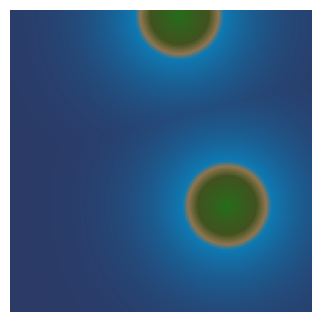

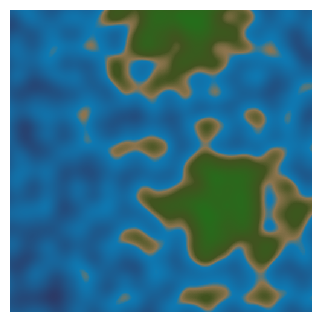

In [43]:
land = worley_land_mass(points = 2, seed = 100, cutoff=0, radius=5)
Heatmap(land)
Heatmap(3*land + smooth(10, 50))

In [44]:
def land_mass_center(integrity=10.0):
	return 1 + norm(simplex(resolution=RESOLUTION, octaves=10, persistence=integrity, lacunarity=-0.03, seed=500))
Noise(land_mass_center, integrity=(-3.0, 10.0), cbar=True)

interactive(children=(FloatSlider(value=3.5, description='integrity', max=10.0, min=-3.0), Output()), _dom_cla…

In [45]:
def land_mass_shape(lacunarity = 0.0, seed = (0, 1000)):
	return simplex(resolution=RESOLUTION, octaves=4, persistence=2,
	lacunarity=lacunarity + 0.2, seed=seed)
Noise(land_mass_shape,
	lacunarity = (-0.1, 0.1, 0.01),
	seed = (0, 1000),
    cbar=True)

interactive(children=(FloatSlider(value=0.0, description='lacunarity', max=0.1, min=-0.1, step=0.01), IntSlide…

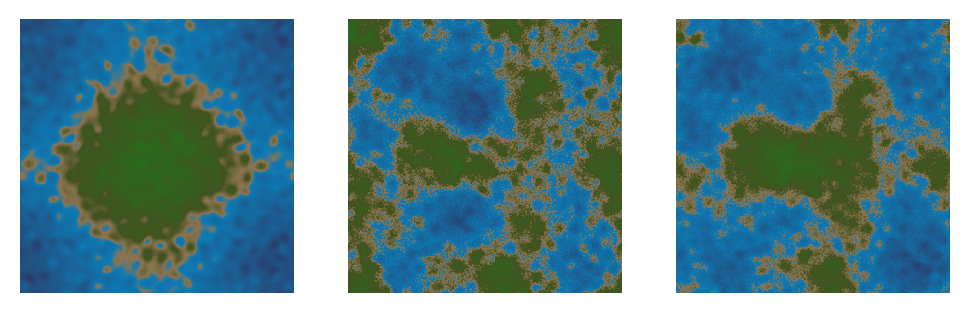

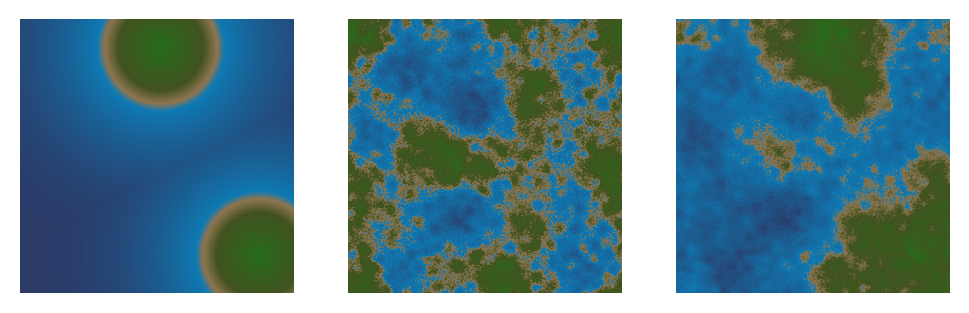

In [46]:
CENTER = land_mass_center()
SHAPE = land_mass_shape(lacunarity=-0.03, seed=300)
land = worley_land_mass(points = 2, seed = 3000, cutoff=0, radius=3)

Heatmap(land_mass_center(), SHAPE, 1.5*CENTER + SHAPE, scale=2.0)
Heatmap(land, SHAPE, 1.5*land + SHAPE, scale=2.0)

In [47]:
def land_mass(clusters = 1, seed=123):
	alpha = 1.5
	if clusters == 1:
		clusters = 2*land_mass_center()
	else:
		clusters = worley_land_mass(points=clusters, radius=3+clusters/10, seed=seed)
	return land_mass_shape(lacunarity=0, seed=seed) + alpha * clusters
Noise(land_mass, clusters=(1,100), seed = 1000, cbar=True)

interactive(children=(IntSlider(value=50, description='clusters', min=1), IntSlider(value=1000, description='s…

In [48]:
def sketch(clusters = 1, seed = 1000):
	m = norm(land_mass(clusters=clusters, seed=seed)-1)
	return np.sign(m) * np.abs(m)**0.5

In [49]:
Noise(sketch, clusters=(1,100), seed=1000, cbar=True, scale = 2.0)

interactive(children=(IntSlider(value=50, description='clusters', min=1), IntSlider(value=1000, description='s…

In [50]:
def boundary(temperature=20, cutoff=0):
	return cut(-heat(RESOLUTION, temperature, 250, 250), cutoff)

Noise(boundary,
	cutoff=(0.0, 1.0),
	temperature = (0, 30),
	cbar = True, cmap = 'coolwarm')

interactive(children=(FloatSlider(value=0.5, description='cutoff', max=1.0), IntSlider(value=15, description='…

In [53]:
def rounded(clusters = 1, beaches = 0.6, border = True, uwu = 1.0, seed = 1000):
	m = norm(land_mass(clusters=clusters, seed=seed)-1)
	if border:
		m -= boundary(20, 0)
		beaches -= 0.1

	m += uwu
	return np.sign(m) * np.abs(m)**beaches

Noise(rounded, clusters=(1,100), beaches=(0.4, 2.0,0.01), uwu = 0.0, seed=(0,5000), border=True, cbar=True, scale = 2.0)

interactive(children=(IntSlider(value=50, description='clusters', min=1), FloatSlider(value=0.6000000000000001…